In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load and prepare your data
county = pd.read_csv(r'/home/cs179g/workspace/county_market_tracker.tsv000', delimiter='\t')
county.fillna(0, inplace=True)
data = county
data['year'] = pd.to_datetime(data['period_begin']).dt.year
data['soc_eco_class'] = pd.qcut(data['median_sale_price'], 3, labels=["Low", "Medium", "High"])

# Encode categorical data if needed
label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])  # Assuming 'region' is a categorical feature

# Features and target variable
X = data[['median_sale_price', 'median_list_price', 'region', 'homes_sold']]  # Add more features as necessary
y = data['soc_eco_class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)


              precision    recall  f1-score   support

        High       1.00      1.00      1.00     56110
         Low       1.00      1.00      1.00     56455
      Medium       1.00      1.00      1.00     56372

    accuracy                           1.00    168937
   macro avg       1.00      1.00      1.00    168937
weighted avg       1.00      1.00      1.00    168937

Feature Importances:
                    importance
median_sale_price    0.833549
median_list_price    0.149034
homes_sold           0.017183
region               0.000234


In [5]:
# Assuming you have historical data
historical_predictions = classifier.predict(X)
data['predicted_class'] = historical_predictions

In [6]:
trends_over_time = data.groupby(['year', 'predicted_class']).size().unstack(fill_value=0)

percentage_changes = trends_over_time.pct_change().multiply(100).round(2)

# Concatenate trends and percentage changes for detailed report
detailed_report = pd.concat([trends_over_time, percentage_changes], keys=['Count', 'Percentage Change'], axis=1)

# Display the detailed report
print("Detailed Report on Socioeconomic Trends and Changes:\n", detailed_report)


Detailed Report on Socioeconomic Trends and Changes:
                  Count               Percentage Change              
predicted_class   High    Low Medium              High    Low Medium
year                                                                
2012              7618  26200  14232               NaN    NaN    NaN
2013              9324  24983  16099             22.39  -4.65  13.12
2014             10796  23911  17230             15.79  -4.29   7.03
2015             13330  22936  18931             23.47  -4.08   9.87
2016             15504  21110  20319             16.31  -7.96   7.33
2017             18350  18860  20547             18.36 -10.66   1.12
2018             21193  16423  20908             15.49 -12.92   1.76
2019             23998  14203  20879             13.24 -13.52  -0.14
2020             28970  11139  19885             20.72 -21.57  -4.76
2021             38199   8201  18844             31.86 -26.38  -5.24


In [7]:
# Assuming 'data' DataFrame already has a 'predicted_class' from previous steps
trends_over_time = data.groupby(['year', 'predicted_class']).size().unstack(fill_value=0)


In [8]:
# Prepare to forecast the next 5 years
forecast_years = 5
current_years = np.array(trends_over_time.index).reshape(-1, 1)
future_years = np.arange(current_years[-1, 0] + 1, current_years[-1, 0] + 1 + forecast_years).reshape(-1, 1)

# Predict future trends for each class
forecasted_data = {}
for column in trends_over_time.columns:
    model = LinearRegression()
    model.fit(current_years, trends_over_time[column])
    forecasted_data[column] = model.predict(future_years)

# Convert forecasted data into a DataFrame
forecasted_df = pd.DataFrame(forecasted_data, index=future_years.flatten(), columns=trends_over_time.columns)

# Display the forecasted trends
print("Forecasted Socioeconomic Trends for the Next 5 Years:\n", forecasted_df)


# Calculate the percentage change year-over-year for forecasted data
forecasted_percentage_changes = forecasted_df.pct_change().multiply(100).round(2)


# Display the combined percentage changes
print("Combined Historical and Forecasted Year-over-Year Percentage Changes:\n", forecasted_percentage_changes)




Forecasted Socioeconomic Trends for the Next 5 Years:
 predicted_class          High          Low        Medium
2022             35568.066667  7822.333333  21867.866667
2023             38629.860606  5827.012121  22427.951515
2024             41691.654545  3831.690909  22988.036364
2025             44753.448485  1836.369697  23548.121212
2026             47815.242424  -158.951515  24108.206061
Combined Historical and Forecasted Year-over-Year Percentage Changes:
 predicted_class  High     Low  Medium
2022              NaN     NaN     NaN
2023             8.61  -25.51    2.56
2024             7.93  -34.24    2.50
2025             7.34  -52.07    2.44
2026             6.84 -108.66    2.38


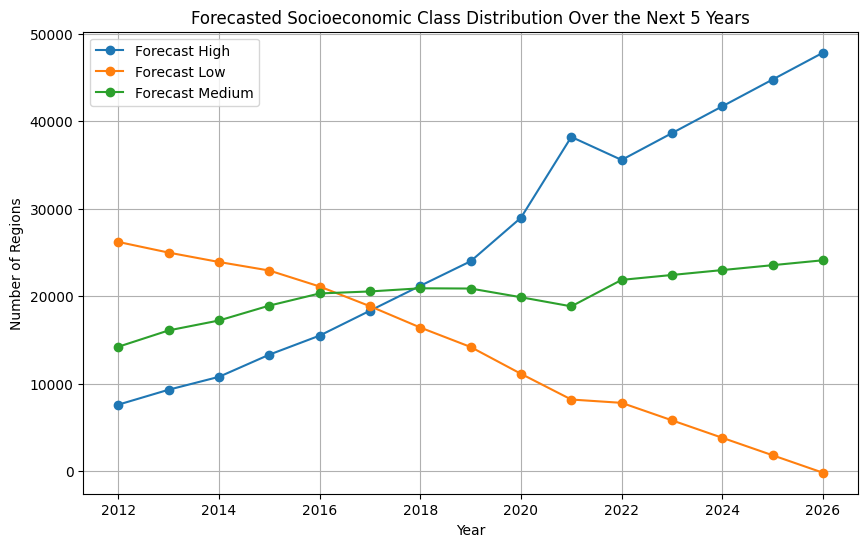

In [9]:
plt.figure(figsize=(10, 6))
for column in forecasted_df.columns:
    plt.plot(np.concatenate([current_years.flatten(), future_years.flatten()]),
             np.concatenate([trends_over_time[column], forecasted_df[column]]),
             marker='o', label=f'Forecast {column}')

plt.title('Forecasted Socioeconomic Class Distribution Over the Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Regions')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
#Industry Potential Prediction

In [18]:
county = pd.read_csv(r'C:\Users\gurma\Downloads\archive\county_market_tracker.tsv000', delimiter='\t')
county.fillna(0, inplace=True)
data = county

In [19]:
data['year'] = pd.to_datetime(data['period_begin']).dt.year

homes_sold_per_region = data.groupby(['region', 'year'])['homes_sold'].sum().unstack()

print(homes_sold_per_region.head())

year                     2012     2013     2014     2015     2016     2017  \
region                                                                       
Abbeville County, SC     32.0     60.0     82.0     90.0    114.0     96.0   
Ada County, ID        14796.0  16746.0  16282.0  19150.0  21686.0  21972.0   
Adair County, IA         94.0     92.0    126.0     68.0     78.0     96.0   
Adair County, OK         66.0    102.0     90.0     94.0     92.0    128.0   
Adams County, CO      12726.0  15810.0  16591.0  17886.0  17872.0  18166.0   

year                     2018     2019     2020     2021  
region                                                    
Abbeville County, SC     92.0    130.0    160.0    194.0  
Ada County, ID        22117.0  24468.0  26320.0  22898.0  
Adair County, IA        104.0     78.0    116.0    118.0  
Adair County, OK        112.0    176.0    190.0    200.0  
Adams County, CO      17546.0  19053.0  19996.0  20633.0  


In [20]:
# Calculate the growth rate in home sales
industry_potential = homes_sold_per_region.pct_change(axis=1).mean(axis=1)

# Prepare the features and target dataset
features = homes_sold_per_region.fillna(0)
target = industry_potential.fillna(0)

# Display the prepared features and target
print("Features:\n", features.head())
print("Target:\n", target.head())


Features:
 year                     2012     2013     2014     2015     2016     2017  \
region                                                                       
Abbeville County, SC     32.0     60.0     82.0     90.0    114.0     96.0   
Ada County, ID        14796.0  16746.0  16282.0  19150.0  21686.0  21972.0   
Adair County, IA         94.0     92.0    126.0     68.0     78.0     96.0   
Adair County, OK         66.0    102.0     90.0     94.0     92.0    128.0   
Adams County, CO      12726.0  15810.0  16591.0  17886.0  17872.0  18166.0   

year                     2018     2019     2020     2021  
region                                                    
Abbeville County, SC     92.0    130.0    160.0    194.0  
Ada County, ID        22117.0  24468.0  26320.0  22898.0  
Adair County, IA        104.0     78.0    116.0    118.0  
Adair County, OK        112.0    176.0    190.0    200.0  
Adams County, CO      17546.0  19053.0  19996.0  20633.0  
Target:
 region
Abbeville Cou

C:\Users\gurma\AppData\Local\Temp\ipykernel_22256\3266084700.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  industry_potential = homes_sold_per_region.pct_change(axis=1).mean(axis=1)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.4f}')


Mean Squared Error: 76.7345


In [29]:
from sklearn.linear_model import LinearRegression

# Initialize and train the regression model
model = LinearRegression()
model.fit(features, target)  # Using the entire dataset for training

# Predicting industry potential for all regions
all_predictions = model.predict(features)

# Adding predictions as a new column in the original DataFrame
# Assuming 'homes_sold_per_region' has regions as the index
homes_sold_per_region['predicted_industry_potential'] = all_predictions

# Display the updated DataFrame
print(homes_sold_per_region.head())

import matplotlib.pyplot as plt





year                     2012     2013     2014     2015     2016     2017  \
region                                                                       
Abbeville County, SC     32.0     60.0     82.0     90.0    114.0     96.0   
Ada County, ID        14796.0  16746.0  16282.0  19150.0  21686.0  21972.0   
Adair County, IA         94.0     92.0    126.0     68.0     78.0     96.0   
Adair County, OK         66.0    102.0     90.0     94.0     92.0    128.0   
Adams County, CO      12726.0  15810.0  16591.0  17886.0  17872.0  18166.0   

year                     2018     2019     2020     2021  \
region                                                     
Abbeville County, SC     92.0    130.0    160.0    194.0   
Ada County, ID        22117.0  24468.0  26320.0  22898.0   
Adair County, IA        104.0     78.0    116.0    118.0   
Adair County, OK        112.0    176.0    190.0    200.0   
Adams County, CO      17546.0  19053.0  19996.0  20633.0   

year                  predicted_

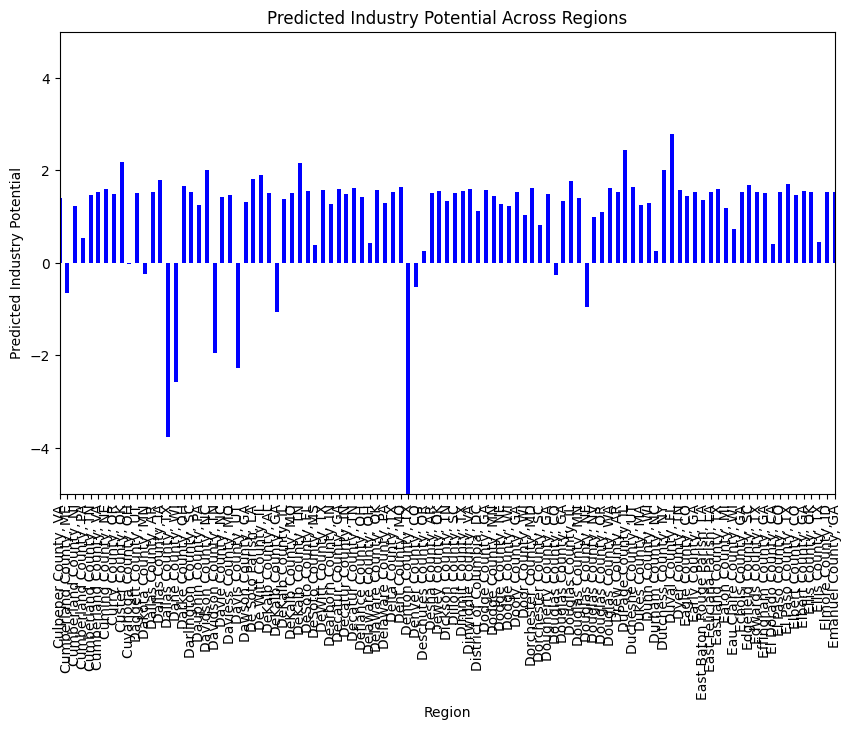

In [31]:
plt.figure(figsize=(10, 6))
homes_sold_per_region['predicted_industry_potential'].plot(kind='bar', color='blue')
plt.title('Predicted Industry Potential Across Regions')
plt.xlabel('Region')
plt.ylabel('Predicted Industry Potential')
plt.ylim([-5, 5])
plt.xlim(400, 500)
plt.show()

In [27]:
# Predicting industry potential for an example region
example_region_data = homes_sold_per_region.iloc[1].values.reshape(1, -1)  # Example data from the first region
predicted_potential = model.predict(example_region_data)
print(f'Predicted Industry Potential for the region: {predicted_potential[0]:.4f}')


ValueError: X has 11 features, but LinearRegression is expecting 10 features as input.